<a href="https://colab.research.google.com/github/tallwin/Forecasting-Airlines/blob/main/Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
airline = pd.read_excel("/content/Airlines+Data.xlsx")
airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [3]:
df=airline.copy()

In [4]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [5]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [6]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
df=df.set_index('Month')

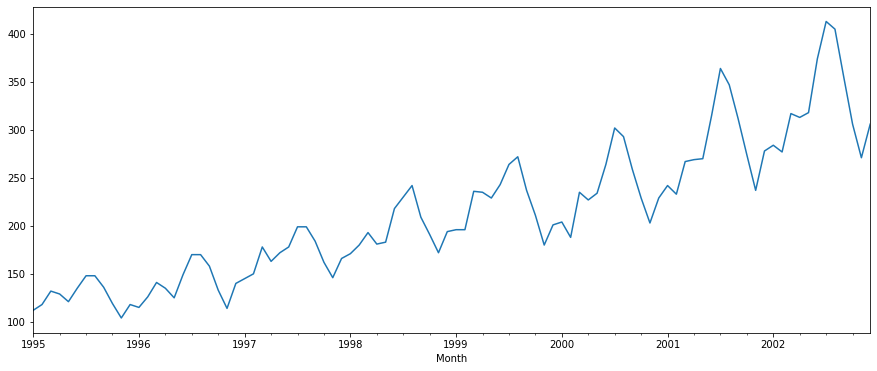

In [8]:
df['Passengers'].plot(figsize=(15, 6))
plt.show()

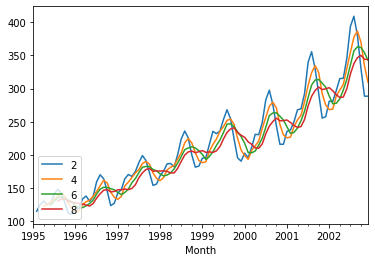

In [9]:
for i in range(2,10,2):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

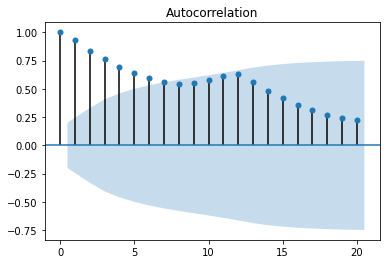

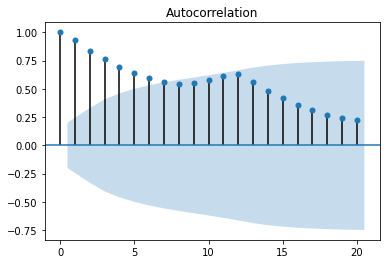

In [10]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df['Passengers'])

Building Time series forecasting with ARIMA

In [11]:
X = df['Passengers'].values

In [12]:
size = int(len(X) * 0.66)

In [13]:
train, test = X[0:size], X[size:len(X)]

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [15]:
model = ARIMA(train, order=(5,1,0))

In [16]:
model_fit = model.fit(disp=0)

In [17]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   62
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -262.909
Method:                       css-mle   S.D. of innovations             16.748
Date:                Fri, 24 Dec 2021   AIC                            539.817
Time:                        14:40:55   BIC                            554.707
Sample:                             1   HQIC                           545.663
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7497      1.477      1.185      0.241      -1.145       4.644
ar.L1.D.y      0.0905      0.134      0.677      0.501      -0.171       0.352
ar.L2.D.y     -0.2096      0.135     -1.549      0.1

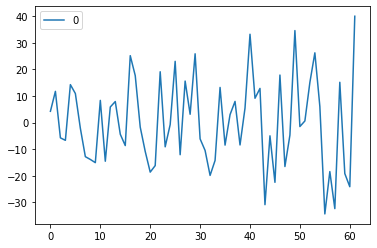

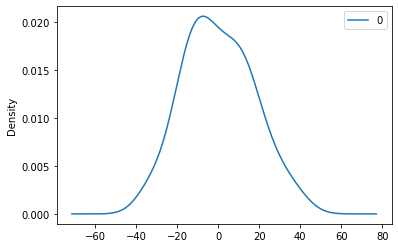

               0
count  62.000000
mean    0.057354
std    16.895802
min   -34.303295
25%   -12.610649
50%    -1.589477
75%    12.565606
max    39.955360


In [18]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Comparing Multiple Models

In [19]:
df1 = airline.copy()

In [20]:
df1["Date"] = pd.to_datetime(df1.Month,format="%b-%y")
df1["month"] = df1.Date.dt.strftime("%b")
df1["year"] = df1.Date.dt.strftime("%Y")

In [21]:
t= np.arange(1,97)

In [22]:
df1['t'] = t

In [23]:
df1['t_sq'] = df1['t']*df1['t']

In [24]:
log_Passengers=np.log(df1['Passengers'])
df1['log_Passengers']=log_Passengers

In [25]:
df1.head()

,Month,Passengers,Date,month,year,t,t_sq,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,5,25,4.795791


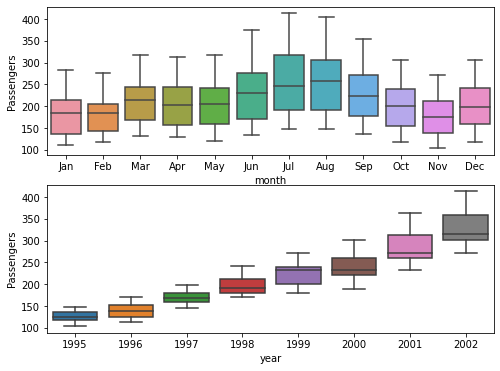

In [26]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df1)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df1)

In [27]:
df1=df1.dropna()
df1['Passengers']=df1['Passengers'].astype(int)
df1

,Month,Passengers,Date,month,year,t,t_sq,log_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,92,8464,6.003887
92,2002-09-01,355,2002-09-01,Sep,2002,93,8649,5.872118
93,2002-10-01,306,2002-10-01,Oct,2002,94,8836,5.723585
94,2002-11-01,271,2002-11-01,Nov,2002,95,9025,5.602119


In [28]:
#Train Test Split
train, test = np.split(df1, [int(.67 *len(df1))])

In [29]:
#Linear Model
linear= smf.ols('Passengers ~ t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

25.50398351648347

In [30]:
#Quadratic Model
quad=smf.ols('Passengers~t+t_sq',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_sq']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

53.1895551441541

In [31]:
#Exponential Model
expo=smf.ols('Passengers~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

1.6030945933279498e+128

In [32]:
#additive seasonality
additive= smf.ols('Passengers~ month',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['month']])))
rmseadd=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

123.94935401651405

In [33]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~ month',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','month']])))
rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

123.94935401651405

In [34]:
#additive seasonality with quadratic trend
addquad=smf.ols('Passengers~t+t_sq+month',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_sq','month']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

34.50350403856853

In [35]:
#multiplicative seasonality
mulsea=smf.ols('log_Passengers~month',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['month']])))
rmsemul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

127.83693479585892

In [36]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Passengers~t+month',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','month']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

12.759135120294532

In [37]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Passengers~t+t_sq+month',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_sq','month']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

28.25957879066163

In [38]:
#tabulating the rmse values

output = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
          'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
rmse=pd.DataFrame(output)
print(rmse)

           Model         Values
0  rmse_mul_quad   2.825958e+01
1        rmseadd   1.239494e+02
2  rmseaddlinear   1.239494e+02
3    rmseaddquad   3.450350e+01
4       rmseexpo  1.603095e+128
5        rmselin   2.550398e+01
6        rmsemul   1.278369e+02
7      rmsemulin   1.275914e+01
8       rmsequad   5.318956e+01


final model with least rmse value that is multiplicative seasonality with linear trend(mulin)